In [1]:
from src.utils import fetch_telecom_data
from src.preprocessing import preprocess_data

# Load the data from the database

In [2]:
# Load the data
df = fetch_telecom_data()

# Preprocess the data:
- (treat missing & outliers by replacing by the mean or the mode of the corresponding variable)

In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Check for outliers

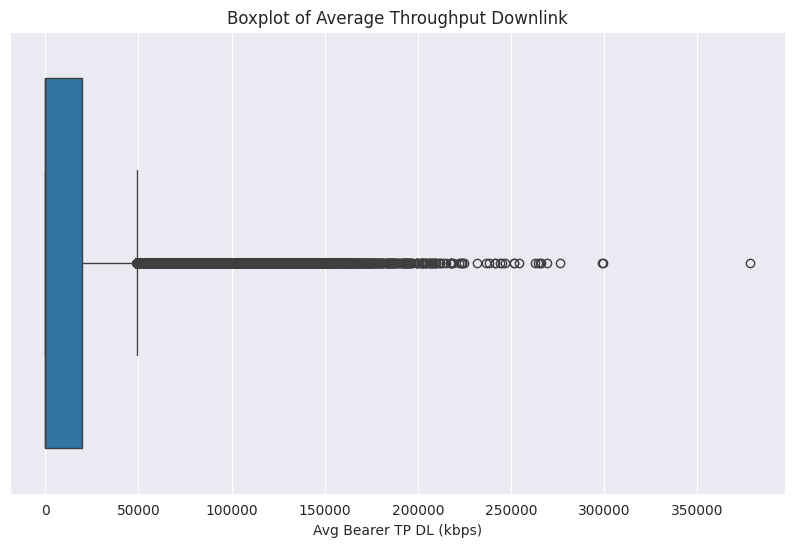

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Avg Bearer TP DL (kbps)'])
plt.title('Boxplot of Average Throughput Downlink')
plt.show()

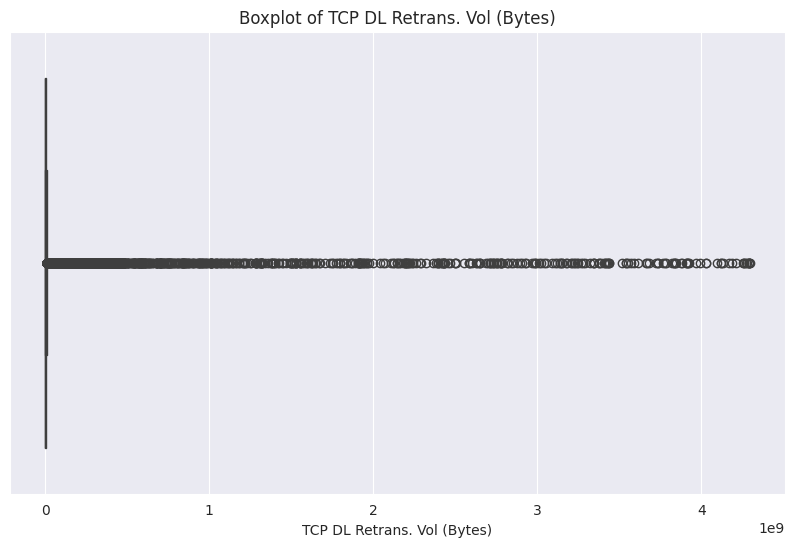

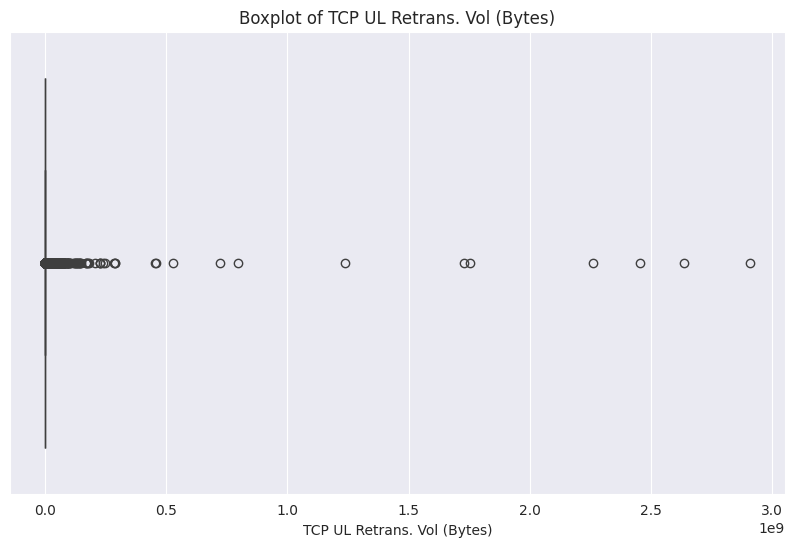

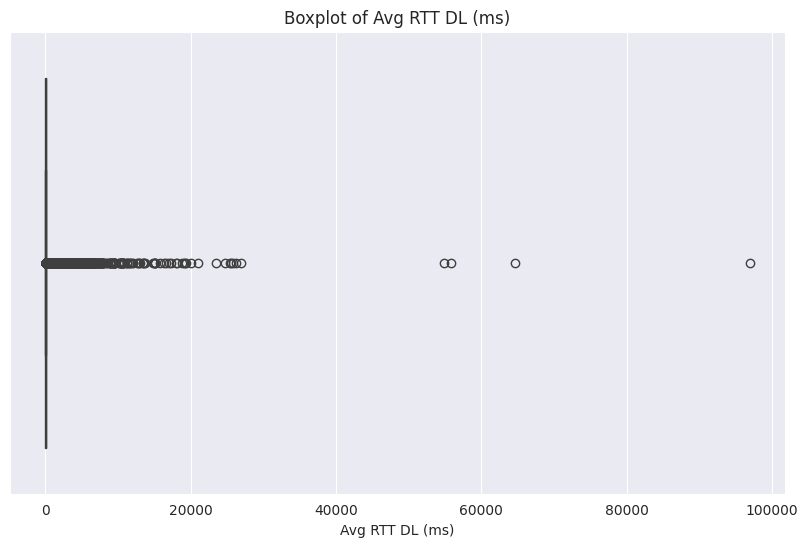

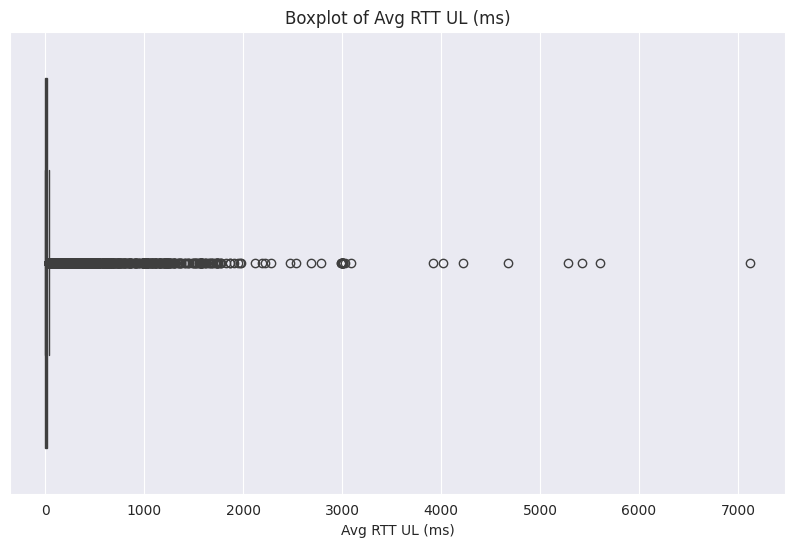

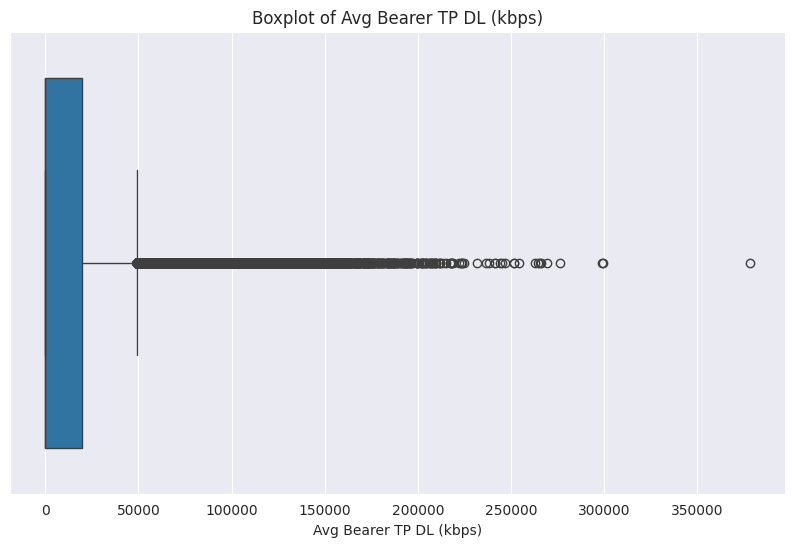

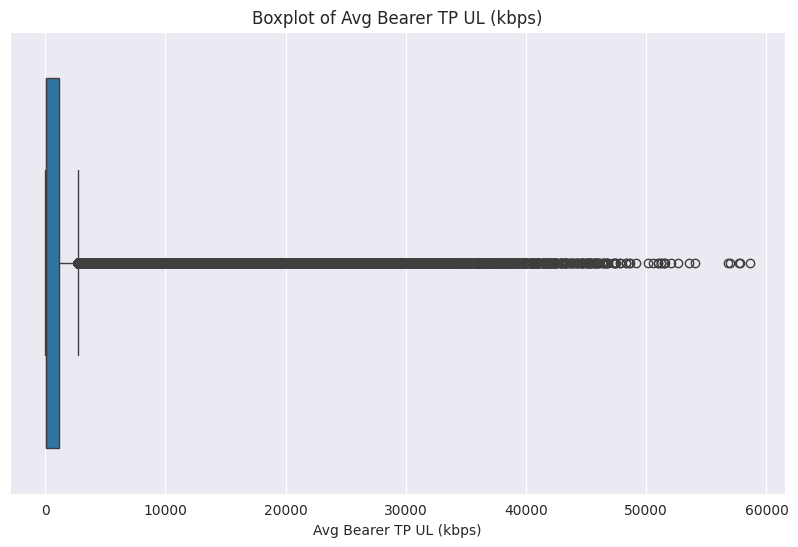

In [5]:
# Define the columns to plot
columns_to_plot = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Plot boxplots for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [6]:


# Define the columns
timestamp_cols = ['Start', 'End']
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Handset Type', 'Handset Manufacturer']

# Preprocess the data
df_preprocessed = preprocess_data(df, timestamp_cols, numeric_features, categorical_features, numeric_scaling=None)

In [7]:
df_preprocessed.head()

,Bearer Id,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),IMSI,MSISDN/Number,IMEI,Last Location Name,Handset Type,Handset Manufacturer
0,13114483460844900352.0,770.0,662.0,104608.560347,42.0,5.0,23.0,44.0,568730.0,20949.5,...,171744450.0,8814393.0,36749741.0,308879636.0,208201448079117.0,33664962239.0,35521209507511.0,9.16456699548519E+015,Samsung Galaxy A5 Sm-A520F,Samsung
1,13114483482878900224.0,235.0,606.0,104608.560347,65.0,5.0,16.0,26.0,568730.0,20949.5,...,526904238.0,15055145.0,53800391.0,653384965.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,Samsung Galaxy J5 (Sm-J530),Samsung
2,13114483484080500736.0,1.0,652.0,104608.560347,45.0,5.0,6.0,9.0,568730.0,20949.5,...,410692588.0,4215763.0,27883638.0,279807335.0,208200314458056.0,33760627129.0,35281510359387.0,D42335A,Samsung Galaxy A8 (2018),Samsung
3,13114483485442799616.0,486.0,171.0,104608.560347,45.0,5.0,44.0,44.0,568730.0,20949.5,...,749039933.0,12797283.0,43324218.0,846028530.0,208201402342131.0,33750343200.0,35356610164913.0,T21824A,Huawei B528S-23A,Apple
4,13114483499480700928.0,565.0,954.0,104608.560347,45.0,5.0,6.0,9.0,568730.0,20949.5,...,550709500.0,13910322.0,38542814.0,569138589.0,208201401415120.0,33699795932.0,35407009745539.0,D88865A,Samsung Sm-G390F,Samsung


### handler outliers by replacing by the mean or the mode of the corresponding variable

In [9]:
import numpy as np
from scipy.stats import skew

def handle_outliers_mean_mode(df, numeric_features):
    for feature in numeric_features:
        if skew(df[feature]) > 0.5:  # if the data is skewed, use the median
            median = df[feature].median()
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), median, df[feature])
        else:  # if the data is not skewed, use the mean
            mean = df[feature].mean()
            std = df[feature].std()

            lower_bound = mean - 2 * std
            upper_bound = mean + 2 * std

            df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), mean, df[feature])
    return df

# Handle outliers by replacing with the mean or mode
df_preprocessed = handle_outliers_mean_mode(df_preprocessed, numeric_features)

ValueError: data type <class 'numpy.object_'> not inexact

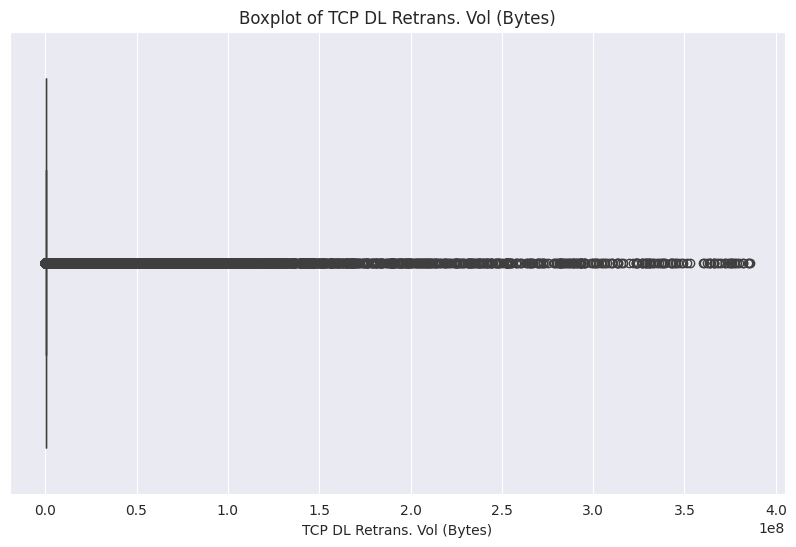

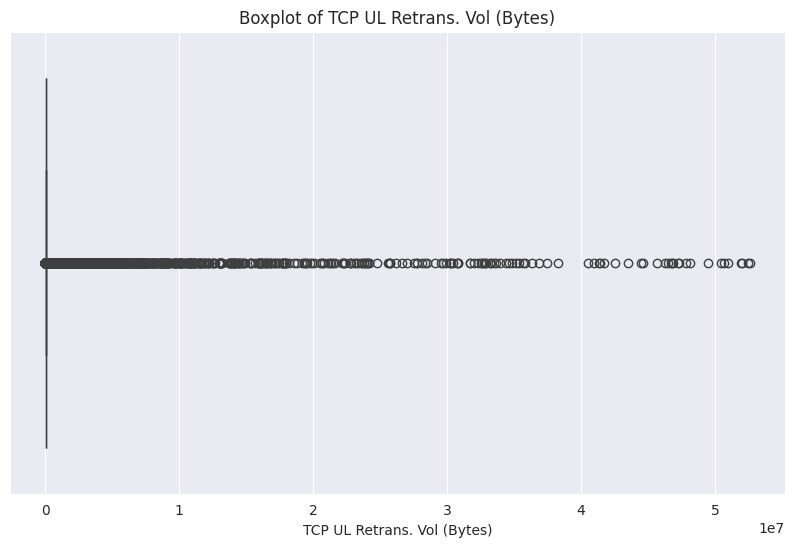

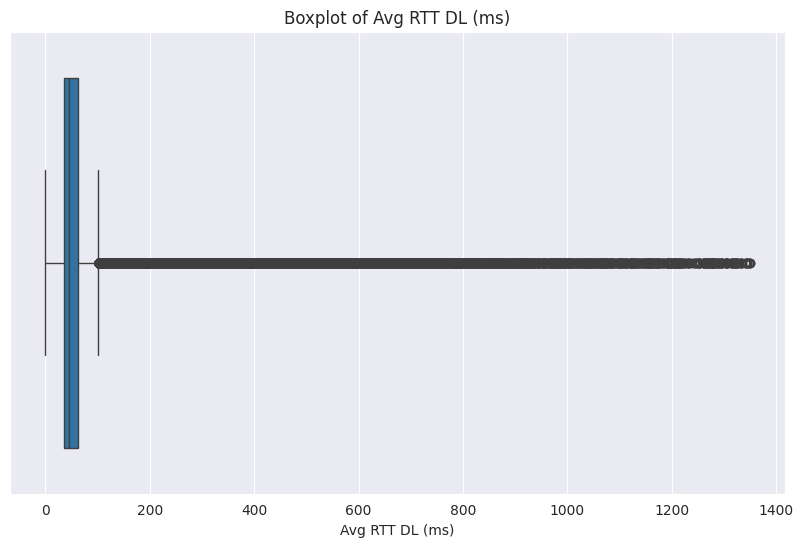

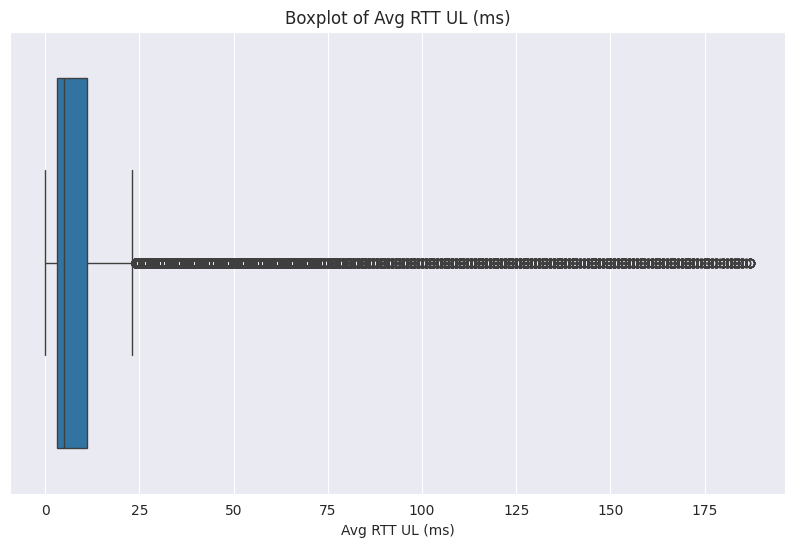

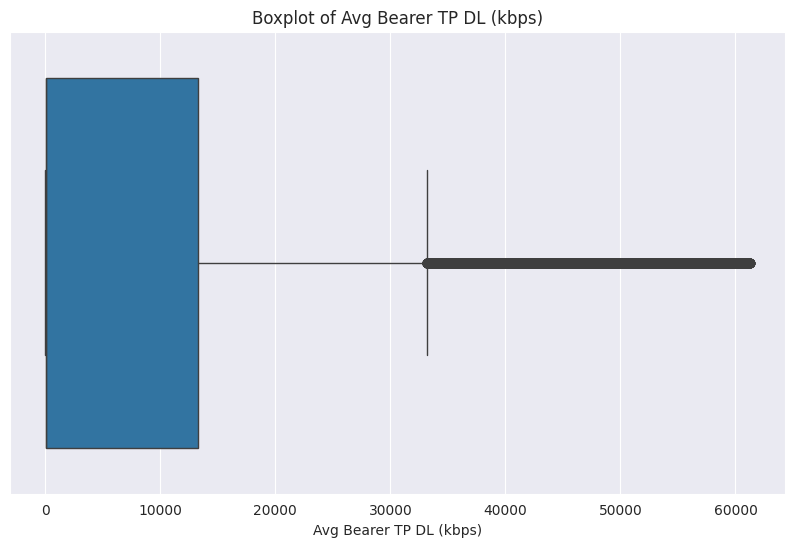

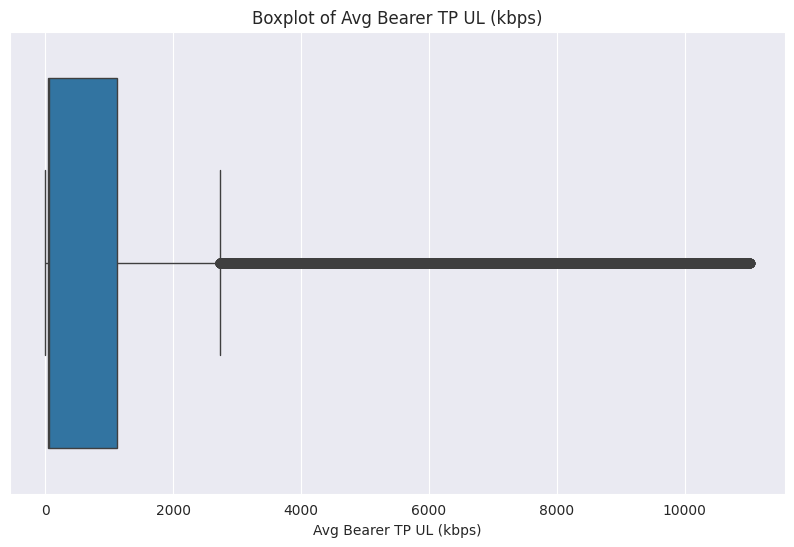

In [10]:
# Define the columns to plot
columns_to_plot = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Plot boxplots for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_preprocessed[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    

In [ ]:
df_preprocessed.columns

# Save the preprocessed data

In [ ]:
# Save the preprocessed data
from src.utils import save_data_to_db
save_data_to_db(df_preprocessed, 'clean_data')

# Task 4.1
## Aggregate , per customer, the following information:
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput


In [ ]:
# Group the data by 'MSISDN/Number' and calculate the mean of the specified columns
df_grouped = df_preprocessed.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
})

# Get the most frequent 'Handset Type' for each customer
most_frequent_handset = df_preprocessed.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.value_counts().index[0])

In [ ]:
# Add the most frequent 'Handset Type' to the grouped data
df_grouped['Handset Type'] = most_frequent_handset

df_grouped.head()

# Task 4.2
Compute & list 10 of the top, bottom and most frequent:
- TCP values in the dataset. 
- RTT values in the dataset.
- Throughput values in the dataset.


In [ ]:
import pandas as pd

# Define the columns to analyze
columns_to_analyze = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Convert the columns to numeric data type
for column in columns_to_analyze:
    df_preprocessed[column] = pd.to_numeric(df_preprocessed[column], errors='coerce')

# Now try to print the top 10, bottom 10, and most frequent 10 values again
for column in columns_to_analyze:
    if df_preprocessed[column].dtype != 'object':
        print(f"Column: {column}")
        print("Top 10 values:")
        print(df_preprocessed[column].nlargest(10))
        print("Bottom 10 values:")
        print(df_preprocessed[column].nsmallest(10))
        print("Most frequent 10 values:")
        print(df_preprocessed[column].value_counts().nlargest(10))
        print("\n")

# Task 4.3
Compute & report:
- The distribution of the average throughput  per handset type and provide interpretation for your findings.
- The average TCP retransmission view per handset type and provide interpretation for your findings.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Handset Type' and calculate the mean of the specified columns
df_grouped_handset = df_preprocessed.groupby('Handset Type').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
})

# Plot the distribution of the average throughput per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_grouped_handset[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']])
plt.title('Distribution of Average Throughput per Handset Type')
plt.ylabel('Throughput (kbps)')
plt.show()

# Plot the distribution of the average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_grouped_handset[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']])
plt.title('Distribution of Average TCP Retransmission per Handset Type')
plt.ylabel('TCP Retransmission (Bytes)')
plt.show()

# Task 4.4
Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features
features = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
df_cluster = df_preprocessed[features]

# Standardize the features
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_cluster_scaled)

# Add the cluster labels to the original dataframe
df_preprocessed['cluster'] = kmeans.labels_

# Analyze the clusters
for i in range(3):
    print(f"Cluster {i}:")
    print(df_preprocessed[df_preprocessed['cluster'] == i][features].describe())
    print("\n")